In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz  
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

In [3]:
boston = datasets.load_boston()            
df = pd.DataFrame(boston.data[:, 12])      # Create DataFrame using only the LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Create new column with the target MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [4]:
X = df[['LSTAT']].values                          # Asignamos la columna de la variable independiente
y = df['MEDV'].values  
sort_idx = X.flatten().argsort()                  
X = X[sort_idx]
y = y[sort_idx]

In [5]:
tree = DecisionTreeRegressor(criterion='mse',     # Inicializamos el arbol en modo regresor
                             max_depth=3)         
tree.fit(X, y)
#x_pred = tree.predict(X)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
x_pred = tree.predict(X)

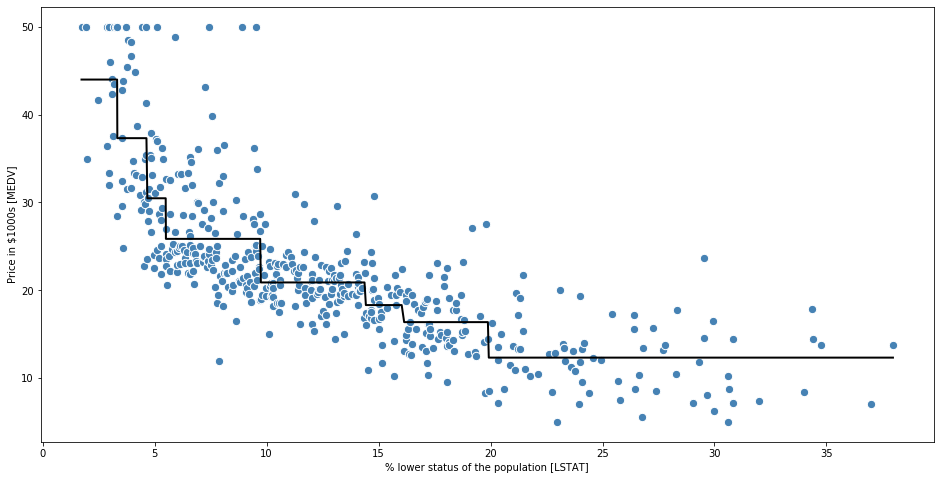

In [13]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                
            edgecolor='white', s=70)
plt.plot(X, x_pred,                      # Mostramos datos predichos contra los que ya teniamos
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

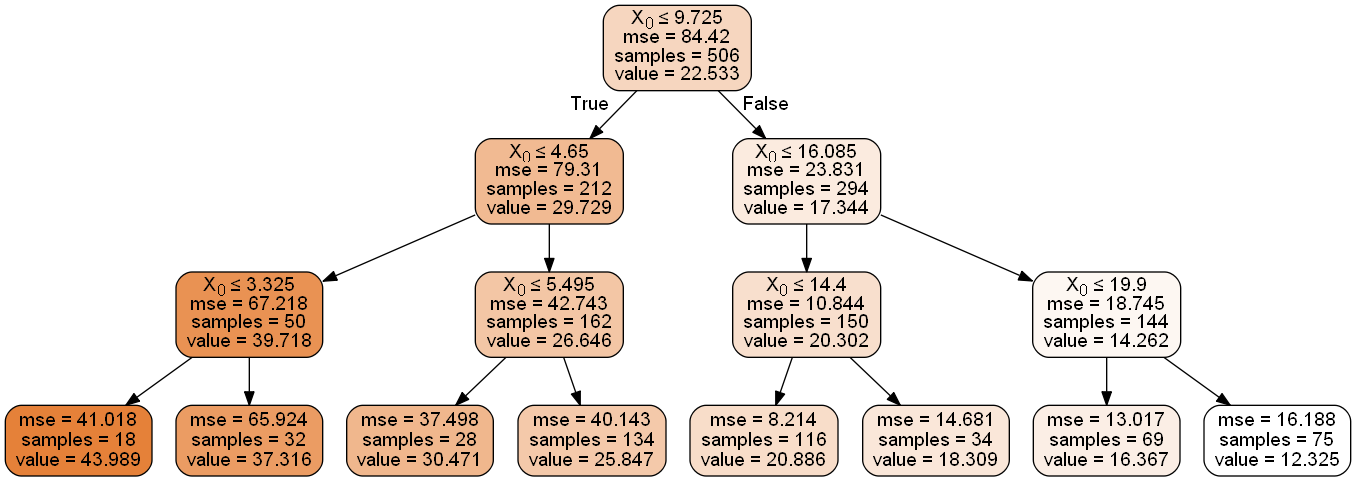

In [14]:
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('boston.png')
Image(graph.create_png())